<a href="https://colab.research.google.com/github/quarcs-lab/mendez2020-convergence-clubs-code-data/blob/master/assets/dat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convergence clubs in labor productivity and its proximate sources

## Import data science libraries

In [ ]:
import numpy as np
import pandas as pd
#import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.base.model as smclass
#import linearmodels as plm

# Set diplay options to two decimals
pd.set_option('display.float_format', '{:.2f}'.format)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import productivity database: Mendez (2020)

In [ ]:
# import data with sorted multi-index
df1 = pd.read_csv("https://raw.githubusercontent.com/quarcs-lab/mendez2020-convergence-clubs-code-data/master/assets/dat.csv", index_col=["country", "year"]).sort_index()
df1 


id        Y       K   pop  ...  log_tfp  region  hi1990  isocode
country year                              ...                                  
Albania 1990    1 12450.00   31217  3.28  ...     5.54  Europe      no      ALB
        1991    1 11310.00   30082  3.28  ...     5.57  Europe      no      ALB
        1992    1 10122.00   28968  3.24  ...     5.61  Europe      no      ALB
        1993    1 11636.00   29010  3.19  ...     5.64  Europe      no      ALB
        1994    1 13120.00   29634  3.14  ...     5.67  Europe      no      ALB
...           ...      ...     ...   ...  ...      ...     ...     ...      ...
Zambia  2010  108 40113.00  173979 13.92  ...     5.77  Africa      no      ZMB
        2011  108 45965.00  232081 14.34  ...     5.83  Africa      no      ZMB
        2012  108 49981.00  246784 14.79  ...     5.90  Africa      no      ZMB
        2013  108 53195.00  266811 15.25  ...     5.96  Africa      no      ZMB
        2014  108 56224.00  288887 15.72  ...     6.03  Africa      no      ZMB

[2700 rows x 27 columns]

In [ ]:
# import data definitions
df2 = pd.read_csv("https://raw.githubusercontent.com/quarcs-lab/mendez2020-convergence-clubs-code-data/master/assets/dat-definitions.csv")
df2 

var_name                                            var_def     type
0         country               Standardized country name (from PWT)    cs_id
1            year                                               Year    ts_id
2               Y                                                GDP  numeric
3               K                                   Physical Capital  numeric
4             pop                                         Population  numeric
5               L                                        Labor Force  numeric
6               s                                 Years of Schooling  numeric
7        alpha_it                             Variable Capital Share  numeric
8           GDPpc                                     GDP per capita  numeric
9              lp                                 Labor Productivity  numeric
10              h                                Human Capital Index  numeric
11             kl                                 Capital per Worker  numeric
12             kp                               Capital Productivity  numeric
13             ky                               Capital-Output Ratio  numeric
14            TFP                               Aggregate Efficiency  numeric
15  log_GDPpc_raw                              Log of GDP per capita  numeric
16     log_lp_raw                          Log of Labor Productivity  numeric
17     log_ky_raw                        Log of Capital-Output Ratio  numeric
18      log_h_raw                               Log of Human Capital  numeric
19    log_tfp_raw                   Log of Total Factor Productivity  numeric
20      log_GDPpc         Trend (HP400) of log of Labor Productivity  numeric
21         log_lp             Trend (HP400) of log of GDP per capita  numeric
22         log_ky       Trend (HP400) of log of Capital-Output Ratio  numeric
23          log_h              Trend (HP400) of log of Human Capital  numeric
24        log_tfp       Trend (HP400) of log of Aggregate Efficiency  numeric
25         region          Regional group (Classification of the UN)   factor
26         hi1990  High income country (as of 1990, World Bank cl...   factor
27        isocode                           ISO code from the PWT9.0   factor

## Describe the dataset

In [ ]:
# descriptive statistics for all countries, all years, all variables
df1.describe()

id           Y           K     pop  ...  log_lp  log_ky   log_h  log_tfp
count 2700.00     2700.00     2700.00 2700.00  ... 2700.00 2700.00 2700.00  2700.00
mean    54.50   583984.54  1822569.81   53.21  ...    9.80    0.97    1.06     6.54
std     31.18  1647698.58  5261927.51  163.01  ...    1.17    0.47    0.29     0.82
min      1.00     2777.00     2004.00    1.32  ...    7.05   -1.81    0.27     4.45
25%     27.75    27881.00    69041.25    5.89  ...    8.80    0.73    0.85     5.88
50%     54.50   125138.00   342061.50   14.13  ...    9.97    1.03    1.11     6.63
75%     81.25   399547.00  1293640.75   40.38  ...   10.85    1.24    1.30     7.18
max    108.00 16810260.00 69379696.00 1369.44  ...   11.98    2.02    1.61     8.59

[8 rows x 24 columns]

In [ ]:
# descriptive statistics for all countries, initial year, selected variables
df1.loc[(slice(None), 1990), ["lp", "kl", "h", "TFP", "log_lp", "log_ky", "log_h", "log_tfp"]].describe()

lp        kl      h     TFP  log_lp  log_ky  log_h  log_tfp
count   108.00    108.00 108.00  108.00  108.00  108.00 108.00   108.00
mean  23223.79  63403.23   2.68  824.21    9.52    0.74   0.95     6.39
std   20088.83  68027.75   0.73  652.60    1.12    0.59   0.29     0.79
min    1299.29    725.04   1.32  139.97    7.05   -1.81   0.27     4.91
25%    6294.13   9651.04   2.08  360.48    8.63    0.48   0.73     5.71
50%   16984.63  35519.55   2.77  702.48    9.70    0.85   1.03     6.54
75%   38834.15 102058.92   3.25 1053.21   10.39    1.13   1.18     6.95
max   75036.34 255639.41   4.25 4164.72   11.23    1.57   1.45     8.34

In [ ]:
# descriptive statistics for all countries, final year, selected variables
df1.loc[(slice(None), 2014), ["lp", "kl", "h", "TFP", "log_lp", "log_ky", "log_h", "log_tfp"]].describe()

lp        kl      h     TFP  log_lp  log_ky  log_h  log_tfp
count    108.00    108.00 108.00  108.00  108.00  108.00 108.00   108.00
mean   40976.87 165853.51   3.30 1103.01   10.16    1.21   1.16     6.74
std    33853.21 158299.10   0.81  837.20    1.15    0.41   0.27     0.81
min     1371.30   2482.35   1.62   71.40    7.42    0.15   0.48     4.45
25%    11806.90  32297.58   2.63  472.78    9.35    0.99   0.97     6.13
50%    32780.59 108045.82   3.35  919.25   10.40    1.21   1.21     6.81
75%    63377.24 276118.62   3.98 1460.42   11.05    1.49   1.39     7.32
max   142219.97 552395.19   5.20 5388.23   11.98    2.02   1.61     8.59

### Profile the dataset

In [ ]:
# install pandas profilling from github
!pip -q install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     |████████████████████████████████| 34.5MB 128kB/s 
     |████████████████████████████████| 81kB 3.7MB/s 
     |████████████████████████████████| 604kB 12.0MB/s 
     |████████████████████████████████| 3.1MB 17.8MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
     |████████████████████████████████| 296kB 42.5MB/s 


In [ ]:
# import libraries
from pandas_profiling import ProfileReport

In [ ]:
# define dataset to profile
df2014 = df1.loc[(slice(None), 2014), ["lp", "kl", "h", "TFP", "log_lp", "log_ky", "log_h", "log_tfp"]]
df2014.reset_index(drop=True, inplace=True)
df2014

lp        kl    h     TFP  log_lp  log_ky  log_h  log_tfp
0   35555.89 127640.20 3.58  462.14   10.49    1.29   1.29     6.14
1   44895.71 155396.63 2.92 1381.59   10.78    1.11   1.05     7.33
2   47512.86 118698.07 3.47 1783.88   10.76    0.86   1.25     7.51
3   22805.71  36610.10 3.85  485.22   10.14    0.39   1.35     6.27
4   86046.52 329658.97 4.09 1899.27   11.41    1.28   1.41     7.60
..       ...       ...  ...     ...     ...     ...    ...      ...
103 40385.42 156742.94 3.12  635.70   10.54    1.39   1.14     6.40
104 36089.37 184725.89 3.34 1055.99   10.68    1.46   1.21     7.15
105  9585.79  27092.06 2.96  885.51    9.19    1.14   1.09     6.77
106 14273.39  35054.76 2.10  664.94    9.89    0.97   0.74     6.69
107 13063.56  67122.44 3.04  379.51    9.54    1.49   1.10     6.03

[108 rows x 8 columns]

In [ ]:
# create the report
profile2014 = ProfileReport(df2014, title="Descriptive Statistics Report for 2014")

In [ ]:
# display the report
profile2014.to_notebook_iframe()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# save report as html
profile2014.to_file("DecriptiveStatisticsReport2014.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# download the report to local computer
from google.colab import files
files.download("DecriptiveStatisticsReport2014.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Time series plots

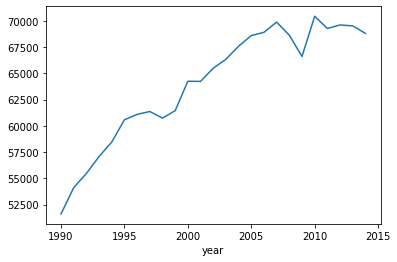

In [ ]:
df1.loc["Japan","lp"].plot()

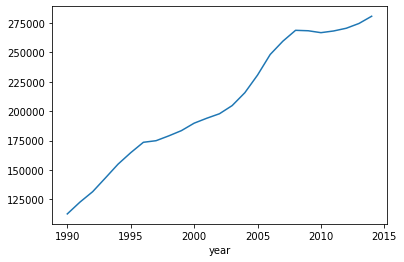

In [ ]:
df1.loc["Japan","kl"].plot()

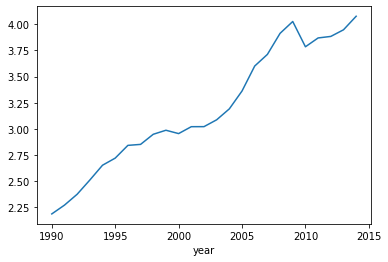

In [ ]:
df1.loc["Japan","ky"].plot()

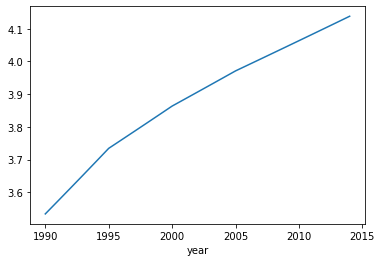

In [ ]:
df1.loc["Japan","h"].plot()

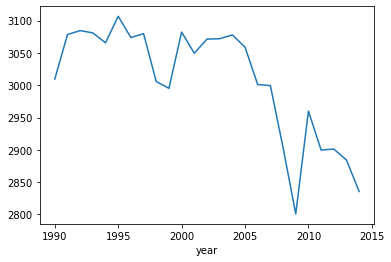

In [ ]:
df1.loc["Japan","TFP"].plot()

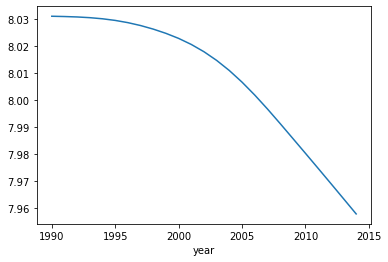

In [ ]:
df1.loc["Japan","log_tfp"].plot()

## Bi-variate plots

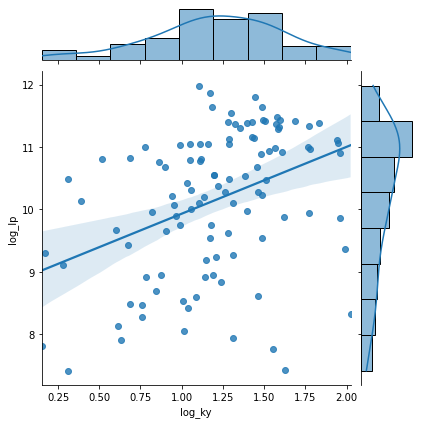

In [ ]:
sns.jointplot(x="log_ky", y="log_lp", data=df2014, kind="reg")

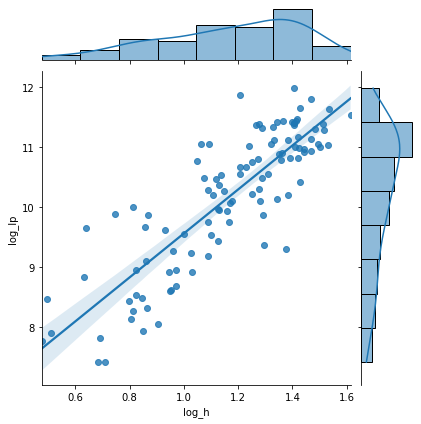

In [ ]:
sns.jointplot(x="log_h", y="log_lp", data=df2014, kind="reg")

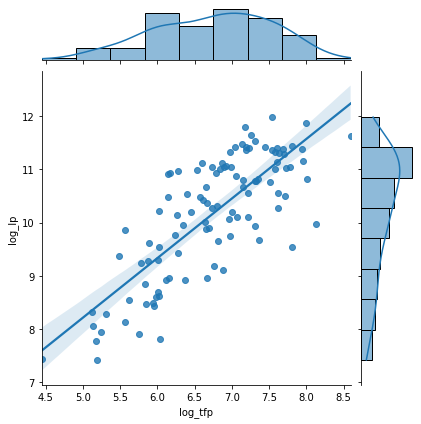

In [ ]:
sns.jointplot(x="log_tfp", y="log_lp", data=df2014, kind="reg")

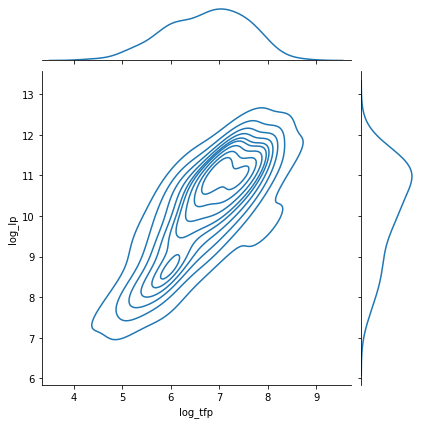

In [ ]:
sns.jointplot(x="log_tfp", y="log_lp", data=df2014, kind="kde");

## Multiple time series plots

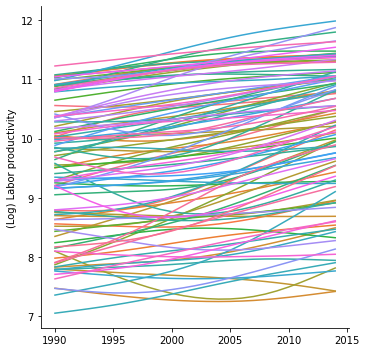

In [ ]:
g = sns.relplot(
    x = "year",
    y = "log_lp",
    data = df1.reset_index(),
    kind = "line",
    hue = "country",
    legend = False
    )

g.set(
    xlabel = "",
    ylabel = "(Log) Labor productivity"
    )
plt.show()

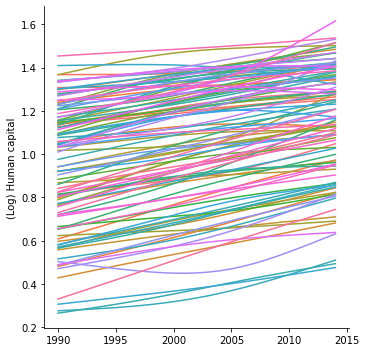

In [ ]:
g = sns.relplot(
    x = "year",
    y = "log_h",
    data = df1.reset_index(),
    kind = "line",
    hue = "country",
    legend = False
    )

g.set(
    xlabel = "",
    ylabel = "(Log) Human capital"
    )
plt.show()

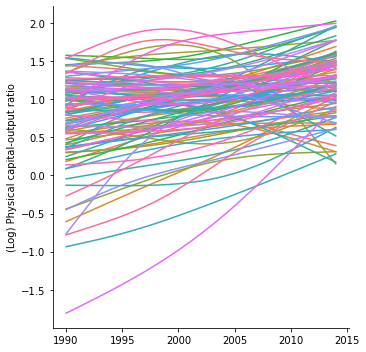

In [ ]:
g = sns.relplot(
    x = "year",
    y = "log_ky",
    data = df1.reset_index(),
    kind = "line",
    hue = "country",
    legend = False
    )

g.set(
    xlabel = "",
    ylabel = "(Log) Physical capital-output ratio"
    )
plt.show()

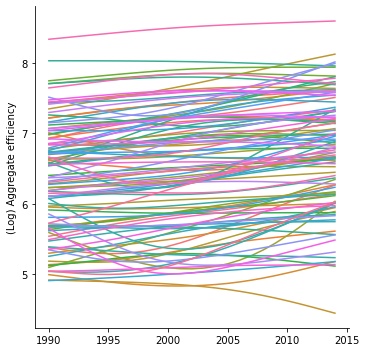

In [ ]:
g = sns.relplot(
    x = "year",
    y = "log_tfp",
    data = df1.reset_index(),
    kind = "line",
    hue = "country",
    legend = False
    )

g.set(
    xlabel = "",
    ylabel = "(Log) Aggregate efficiency"
    )
plt.show()

### Do you see signs of convergence across developed countries?

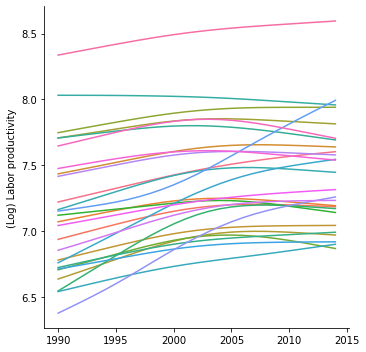

In [ ]:
g = sns.relplot(
    x = "year",
    y = "log_tfp",
    data = df1.loc[df1["hi1990"]=="yes"].reset_index(),
    kind = "line",
    hue = "country",
    legend = False
    )

g.set(
    xlabel = "",
    ylabel = "(Log) Labor productivity"
    )
plt.show()

### Do you see signs of convergence across developing countries?

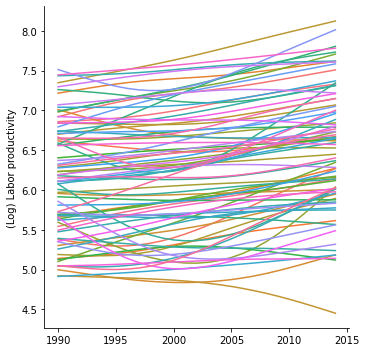

In [ ]:
g = sns.relplot(
    x = "year",
    y = "log_tfp",
    data = df1.loc[df1["hi1990"]=="no"].reset_index(),
    kind = "line",
    hue = "country",
    legend = False
    )

g.set(
    xlabel = "",
    ylabel = "(Log) Labor productivity"
    )
plt.show()

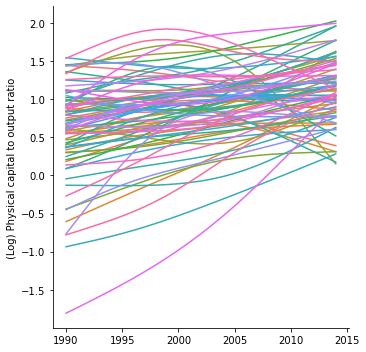

In [ ]:
g = sns.relplot(
    x = "year",
    y = "log_ky",
    data = df1.loc[df1["hi1990"]=="no"].reset_index(),
    kind = "line",
    hue = "country",
    legend = False
    )

g.set(
    xlabel = "",
    ylabel = "(Log) Physical capital to output ratio"
    )
plt.show()